# NCI Dream Gene Copy Number Data Import

Gene copy number data import for NCI DREAM drug sensitivity challenge.

Source data README: /Users/eczech/.synapseCache/452/756452/DREAM7_DrugSensitivity1_SNP6_README.txt

In [1]:
%run -m ipy_startup
%matplotlib inline
from mgds.data_aggregation import database as db
from mgds.data_aggregation import source as src
from mgds.data_aggregation.import_lib import nci_dream
from py_utils.collection_utils import subset

In [6]:
file_path = nci_dream.get_file('SNP6_gene_level.txt')
d = pd.read_csv(file_path, sep='\t')
d.head()

,EntrezID,HGNC_ID,184B5,21MT1,21NT,600MPE,AU565,BT20,BT474,BT483,...,SUM149PT,SUM159PT,SUM185PE,SUM225CWN,SUM229PE,SUM52PE,T47D,UACC812,ZR751,ZR75B
0,403263,OR4G11P,-0.046,0.27,0.112,0.332,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446
1,79501,OR4F5,-0.046,0.27,0.112,0.332,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446
2,645543,LOC645543,-0.046,0.27,0.112,0.332,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446
3,653340,LOC653340,-0.046,0.27,0.112,0.332,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446
4,643670,LOC643670,-0.046,0.27,0.112,0.005,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446


In [7]:
d = d.rename(columns={'HGNC_ID': 'GENE_ID:HGNC', 'EntrezID': 'GENE_ID:ENTREZ'})
id_vars = ['GENE_ID:HGNC', 'GENE_ID:ENTREZ']
d = pd.melt(d, id_vars=id_vars, value_name='VALUE', var_name='CELL_LINE_ID')
assert d.groupby(id_vars + ['CELL_LINE_ID']).size().max() == 1
d = subset(d, lambda df: df[df['VALUE'].notnull()], subset_op='Remove null values for column "VALUE"')
d.head()

[Remove null values for column "VALUE"] Records before = 1279998, Records after = 1278562, Records removed = 1436 (%0.11)


,GENE_ID:HGNC,GENE_ID:ENTREZ,CELL_LINE_ID,VALUE
0,OR4G11P,403263,184B5,-0.046
1,OR4F5,79501,184B5,-0.046
2,LOC645543,645543,184B5,-0.046
3,LOC653340,653340,184B5,-0.046
4,LOC643670,643670,184B5,-0.046


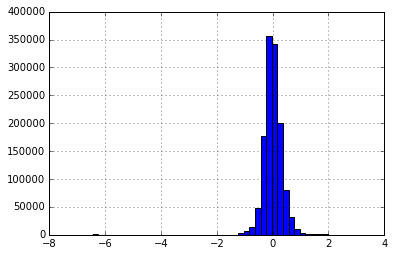

In [8]:
d['VALUE'].hist(bins=50)

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278562 entries, 0 to 1279997
Data columns (total 4 columns):
GENE_ID:HGNC      1278562 non-null object
GENE_ID:ENTREZ    1278562 non-null int64
CELL_LINE_ID      1278562 non-null object
VALUE             1278562 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.8+ MB


In [10]:
assert np.all(pd.notnull(d))
db.save(d, src.NCIDREAM_v1, db.RAW, 'gene-copy-number')

'/Users/eczech/data/research/musc_genomics_db/raw/ncidream_v1_gene-copy-number.pkl'